In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
wq = pd.read_csv("data/wine_quality.csv")

In [6]:
print(wq.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [8]:
print(wq.dtypes, '\n')

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object 



In [9]:
print(wq.describe(include='all').to_string(), '\n')

         type  fixed acidity  volatile acidity  citric acid  residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide      density           pH    sulphates      alcohol      quality
count    6497    6487.000000       6489.000000  6494.000000     6495.000000  6495.000000          6497.000000           6497.000000  6497.000000  6488.000000  6493.000000  6497.000000  6497.000000
unique      2            NaN               NaN          NaN             NaN          NaN                  NaN                   NaN          NaN          NaN          NaN          NaN          NaN
top     white            NaN               NaN          NaN             NaN          NaN                  NaN                   NaN          NaN          NaN          NaN          NaN          NaN
freq     4898            NaN               NaN          NaN             NaN          NaN                  NaN                   NaN          NaN          NaN          NaN          NaN          NaN
mean      NaN  

In [10]:
print(wq.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None 



In [11]:
print(wq.isnull().sum(), '\n')

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64 



In [12]:
wq_copy = wq.copy()

wq_copy.fillna({
    'fixed acidity': wq['fixed acidity'].mean(),
    'volatile acidity': wq['volatile acidity'].mean(),
    'citric acid': wq['citric acid'].mean(),
    'residual sugar': wq['residual sugar'].mean(),
    'chlorides': wq['chlorides'].mean(),
    'free sulfur dioxide': wq['free sulfur dioxide'].mean(),
    'total sulfur dioxide': wq['total sulfur dioxide'].mean(),
    'density': wq['density'].mean(),
    'pH': wq['pH'].mean(),
    'sulphates': wq['sulphates'].mean(),
    'alcohol': wq['alcohol'].mean()
}, inplace=True)

print(wq_copy.describe(include='all').to_string(), '\n')
print(wq_copy.isnull().sum(), '\n')

         type  fixed acidity  volatile acidity  citric acid  residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide      density           pH    sulphates      alcohol      quality
count    6497    6497.000000       6497.000000  6497.000000     6497.000000  6497.000000          6497.000000           6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000
unique      2            NaN               NaN          NaN             NaN          NaN                  NaN                   NaN          NaN          NaN          NaN          NaN          NaN
top     white            NaN               NaN          NaN             NaN          NaN                  NaN                   NaN          NaN          NaN          NaN          NaN          NaN
freq     4898            NaN               NaN          NaN             NaN          NaN                  NaN                   NaN          NaN          NaN          NaN          NaN          NaN
mean      NaN  

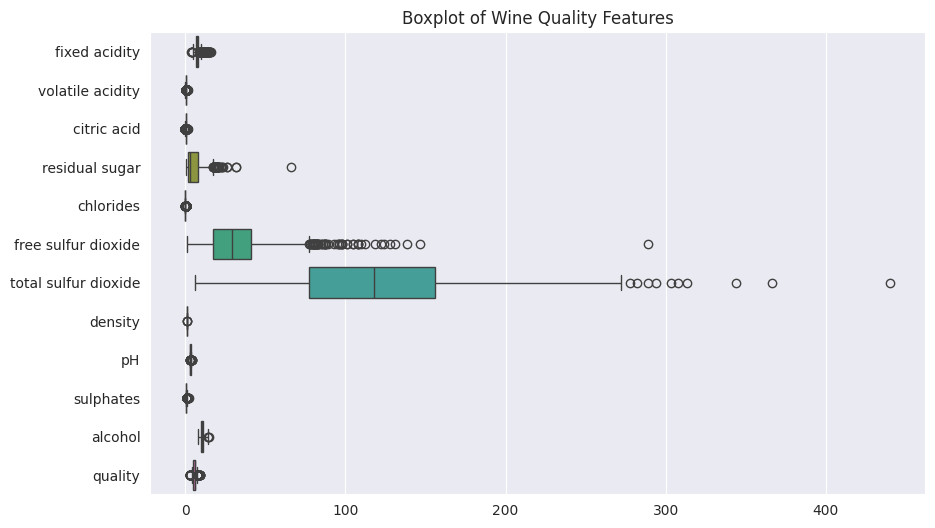

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=wq_copy, orient='h')
plt.title('Boxplot of Wine Quality Features')
plt.show()

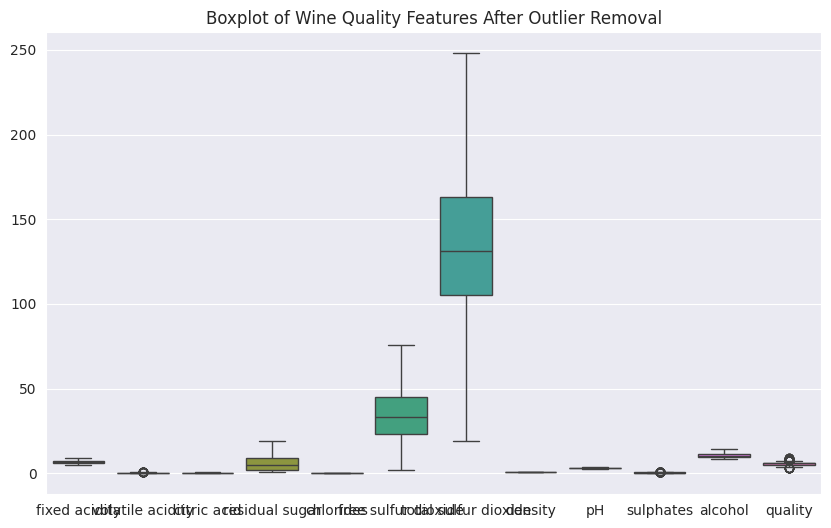

In [30]:

# Identify outliers using IQR method
# Calculate Q1 (25th percentile) and Q3 (75th percentile)

data = wq_copy[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                'density', 'pH', 'sulphates', 'alcohol']]

# remove outliers
def eliminate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] > (Q1 - 1.5 * IQR)) & (df[column] < (Q3 + 1.5 * IQR))]

for column in data.columns:
    wq_copy = eliminate_outliers(wq_copy, column)
plt.figure(figsize=(10, 6))
sns.boxplot(data=wq_copy)
plt.title('Boxplot of Wine Quality Features After Outlier Removal')
plt.show()
